Import Libraries

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


Clone & Explore dataset

In [2]:
#clone the dataset from the github repository
! git clone https://github.com/education454/datasets.git

Cloning into 'datasets'...
remote: Enumerating objects: 2301, done.
remote: Total 2301 (delta 0), reused 0 (delta 0), pack-reused 2301
Receiving objects: 100% (2301/2301), 1.31 GiB | 23.49 MiB/s, done.
Updating files: 100% (2295/2295), done.


In [3]:
#set the path to the main dir
import os
main_dir = "/content/datasets/Data"
#set the path to the train dir
train_dir = os.path.join(main_dir, 'train')

#set the path to the test dir
test_dir = os.path.join(main_dir, 'test')

#directory with the training covid images
train_covid_dir = os.path.join(train_dir, 'COVID19')

#directory with the training normal images
train_normal_dir = os.path.join(train_dir, 'NORMAL')

#directory with the testing covid images
test_covid_dir = os.path.join(test_dir, 'COVID19')

#directory with the testing normal images
test_normal_dir = os.path.join(test_dir, 'NORMAL')

In [4]:
#print the filenames
train_covid_names = os.listdir(train_covid_dir)
print(train_covid_names[:10])

train_normal_names = os.listdir(train_normal_dir)
print(train_normal_names[:10])

test_covid_names = os.listdir(test_covid_dir)
print(test_covid_names[:10])

test_normal_names = os.listdir(test_normal_dir)
print(test_normal_names[:10])

['COVID-19 (13).jpeg', 'COVID19(97).jpg', 'COVID19(494).jpg', 'COVID19(16).jpg', 'COVID19(418).jpg', 'COVID19(51).jpg', 'COVID-19 (1).png', 'COVID19(272).jpg', 'COVID19(266).jpg', 'COVID19(267).jpg']
['NORMAL(1077).jpg', 'NORMAL(1132).jpg', 'NORMAL(495).jpg', 'NORMAL(962).jpg', 'NORMAL(891).jpg', 'NORMAL(444).jpg', 'NORMAL(1137).jpg', 'NORMAL(1090).jpg', 'NORMAL(104).jpg', 'NORMAL(463).jpg']
['COVID19(215).jpg', 'COVID-19 (479).jpg', 'COVID19(8).jpg', 'COVID19(13).jpg', 'COVID19(464).jpg', 'COVID-19 (609).jpg', 'COVID19(449).jpg', 'COVID19(289).jpg', 'COVID-19 (789).jpg', 'COVID-19 (822).jpg']
['NORMAL(187).jpg', 'NORMAL(702).jpg', 'NORMAL(921).jpg', 'NORMAL(1170).jpg', 'NORMAL(1044).jpg', 'NORMAL(760).jpg', 'NORMAL(566).jpg', 'NORMAL(567).jpg', 'NORMAL(551).jpg', 'NORMAL(475).jpg']


In [5]:
#print the total no of images present in each dir
print("Total images present in the training set : ",len(train_covid_names+train_normal_names))
print("Total images present in the test set : ",len(test_covid_names+test_normal_names))

Total images present in the training set :  1811
Total images present in the test set :  484


Data Visualization

['/content/datasets/Data/train/COVID19/COVID-19 (13).jpeg', '/content/datasets/Data/train/COVID19/COVID19(97).jpg', '/content/datasets/Data/train/COVID19/COVID19(494).jpg', '/content/datasets/Data/train/COVID19/COVID19(16).jpg', '/content/datasets/Data/train/COVID19/COVID19(418).jpg', '/content/datasets/Data/train/COVID19/COVID19(51).jpg', '/content/datasets/Data/train/COVID19/COVID-19 (1).png', '/content/datasets/Data/train/COVID19/COVID19(272).jpg']
['/content/datasets/Data/train/NORMAL/NORMAL(1077).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1132).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(495).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(962).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(891).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(444).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1137).jpg', '/content/datasets/Data/train/NORMAL/NORMAL(1090).jpg']


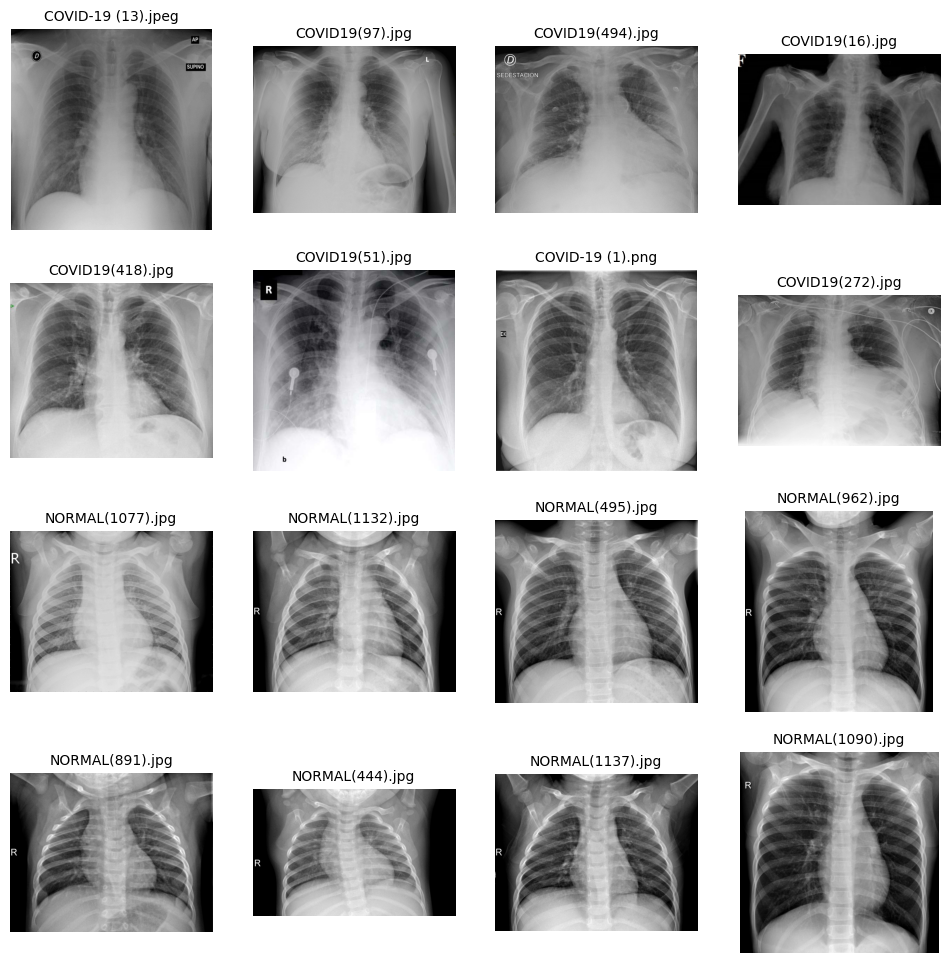

In [6]:
# plot a grid of 16 images (8 images of Covid19 and 8 images of Normal)
import matplotlib.image as mpimg
#set the number of columns and rows
rows = 4
cols = 4
#set the figure size
fig = plt.gcf()
fig.set_size_inches(12, 12)
#get the filenames from the covid & normal dir of the train dataset
covid_pic = [os.path.join(train_covid_dir, filename) for filename in train_covid_names[0:8]]
normal_pic = [os.path.join(train_normal_dir, filename) for filename in train_normal_names[0:8]]
#print the list
print(covid_pic)
print(normal_pic)
#merge the covid and normal list
merged_list = covid_pic + normal_pic
for i, img_path in enumerate(merged_list):
  data = img_path.split('/', 6)[6]
  sp = plt.subplot(rows, cols,(i+1))
  sp.axis('Off')
  img = mpimg.imread(img_path)
  sp.set_title(data, fontsize = 10)
  plt.imshow(img, cmap = 'gray')

Data Preprocessing & Augmentation

In [7]:
# generate training,testing and validation batches
dgen_train = ImageDataGenerator(rescale=1./255,
                                validation_split = 0.2,
                                zoom_range = 0.2,
                                horizontal_flip = True)
dgen_validation = ImageDataGenerator(rescale=1./255)
dgen_test = ImageDataGenerator(rescale=1./255)

train_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'training',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator = dgen_train.flow_from_directory(train_dir,
                                                 target_size = (150, 150),
                                                 subset = 'validation',
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_generator = dgen_train.flow_from_directory(test_dir,
                                                 target_size = (150, 150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 1449 images belonging to 2 classes.
Found 362 images belonging to 2 classes.
Found 484 images belonging to 2 classes.


In [8]:
#get the class indices
#train_generator.class_indices
test_generator.class_indices
#validation_generator.class_indices

{'COVID19': 0, 'NORMAL': 1}

In [9]:
#get the image shape
train_generator.image_shape

(150, 150, 3)


Build Convolutional Neural Network Model

In [10]:
model = Sequential()
# add the convolutional layer
# filters, size of filters,padding,activation_function,input_shape
model.add(Conv2D(32, (5,5), padding = 'same', activation = 'relu', input_shape = (150, 150, 3)))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# add another convolutional layer
model.add(Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
# pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
# place a dropout layer
model.add(Dropout(0.5))
# Flatten layer
model.add(Flatten())
# add a dense layer : amount of nodes, activation
model.add(Dense(256, activation = 'relu'))
# place a dropout layer
model.add(Dropout(0.5))
# 0.5 drop out rate is recommended, half input nodes will be dropped at each update
model.add(Dense(1, activation = 'sigmoid'))
#summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 75, 75, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 37, 37, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 64)        0

Compile & Train the Model

In [11]:
#compile the model
model.compile(Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
#train the model
history = model.fit(train_generator,
                    epochs = 10,
                    validation_data = validation_generator)

Epoch 1/10
46/46 [==============================] - 189s 4s/step - loss: 1.2387 - accuracy: 0.7046 - val_loss: 0.3111 - val_accuracy: 0.9116
Epoch 2/10
46/46 [==============================] - 185s 4s/step - loss: 0.2934 - accuracy: 0.8799 - val_loss: 0.1923 - val_accuracy: 0.9420
Epoch 3/10
46/46 [==============================] - 179s 4s/step - loss: 0.2300 - accuracy: 0.9144 - val_loss: 0.2229 - val_accuracy: 0.9558
Epoch 4/10
46/46 [==============================] - 180s 4s/step - loss: 0.1856 - accuracy: 0.9351 - val_loss: 0.1462 - val_accuracy: 0.9558
Epoch 5/10
46/46 [==============================] - 185s 4s/step - loss: 0.1592 - accuracy: 0.9441 - val_loss: 0.1247 - val_accuracy: 0.9558
Epoch 6/10
46/46 [==============================] - 179s 4s/step - loss: 0.1718 - accuracy: 0.9441 - val_loss: 0.1294 - val_accuracy: 0.9558
Epoch 7/10
46/46 [==============================] - 180s 4s/step - loss: 0.1650 - accuracy: 0.9434 - val_loss: 0.1448 - val_accuracy: 0.9530
Epoch 8/10
46

Performance Evaluation

In [13]:
#get the keys of history object
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

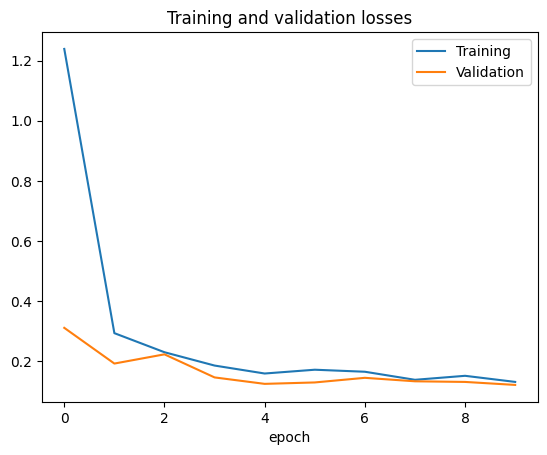

In [14]:
#plot graph between training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation losses')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

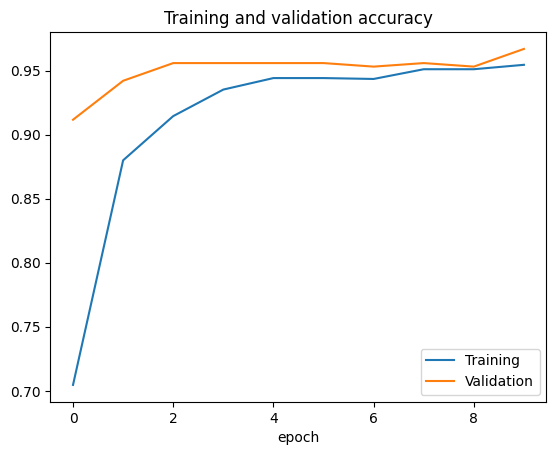

In [15]:
#plot graph between training and validation accuarcy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epoch')

In [16]:
# get the test accuarcy and loss
test_loss , test_acc = model.evaluate(test_generator)
print('test loss : {} test acc : {}'.format(test_loss, test_acc))

16/16 [==============================] - 23s 1s/step - loss: 0.1572 - accuracy: 0.9421
test loss : 0.1571558266878128 test acc : 0.942148745059967


Prediction On New Data

In [17]:
from google.colab import files
import keras.utils as image
uploaded = files.upload()
for filename in uploaded.keys():
  img_path = '/content/'+filename
  print(img_path)
  img = image.load_img(img_path, target_size = (150, 150))
  images = image.img_to_array(img)
  images = np.expand_dims(images, axis = 0)
  prediction = model.predict(images)
  print(filename)

  if prediction == 0:
    print('covid detected')
  else:
    print('your report is normal')